In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
salesforcourse = pd.read_csv("salesforcourse.csv")

In [3]:
# Convert Date to datetime format
salesforcourse['Date'] = pd.to_datetime(salesforcourse['Date'])

# Customer Lifetime Value (CLV) Analysis
# Calculate total revenue per customer
total_revenue_per_customer = salesforcourse.groupby('index')['Revenue'].sum()

# Calculate average revenue per customer
avg_revenue_per_customer = total_revenue_per_customer.mean()

# Calculate CLV
clv = avg_revenue_per_customer * 12  # Assuming average customer lifespan is 1 year

print("Average Customer Lifetime Value (CLV):", clv)

Average Customer Lifetime Value (CLV): 7690.441115815527


Churn Rate: 0.5079301345111423


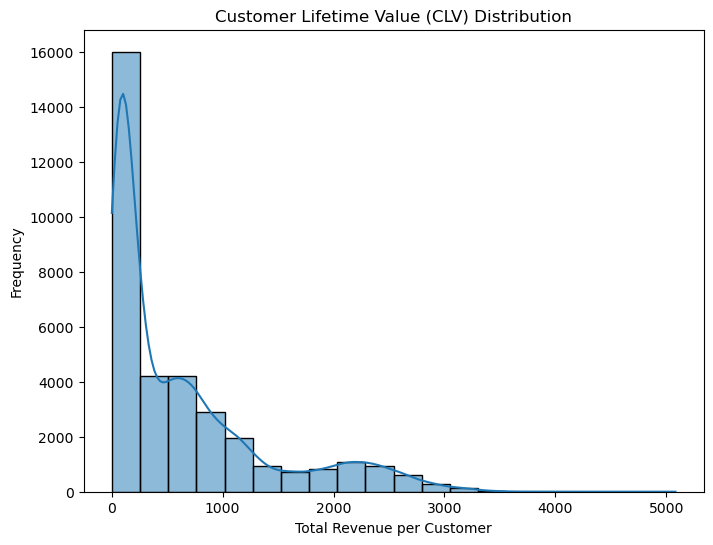

In [4]:
# Churn Analysis
# Identify churned customers as those who have not made a purchase in the last 6 months
last_purchase_date = salesforcourse['Date'].max()
churn_cutoff_date = last_purchase_date - pd.DateOffset(months=6)
churned_customers = salesforcourse[salesforcourse['Date'] < churn_cutoff_date]['index'].unique()

# Calculate churn rate
total_customers = salesforcourse['index'].nunique()
churn_rate = len(churned_customers) / total_customers

print("Churn Rate:", churn_rate)

# Price Sensitivity Analysis
# Calculate price elasticity of demand (PED) for each product category
# PED = (% Change in Quantity Demanded) / (% Change in Price)

# Example:
# Assume there's a 10% decrease in the price of a product category
# Calculate the corresponding percentage change in quantity demanded
# Calculate PED for each product category

# This analysis requires more specific data and assumptions about price changes and quantity demanded.

# Visualizations (Optional)
# Histogram of CLV distribution
plt.figure(figsize=(8, 6))
sns.histplot(total_revenue_per_customer, bins=20, kde=True)
plt.title('Customer Lifetime Value (CLV) Distribution')
plt.xlabel('Total Revenue per Customer')
plt.ylabel('Frequency')
plt.show()


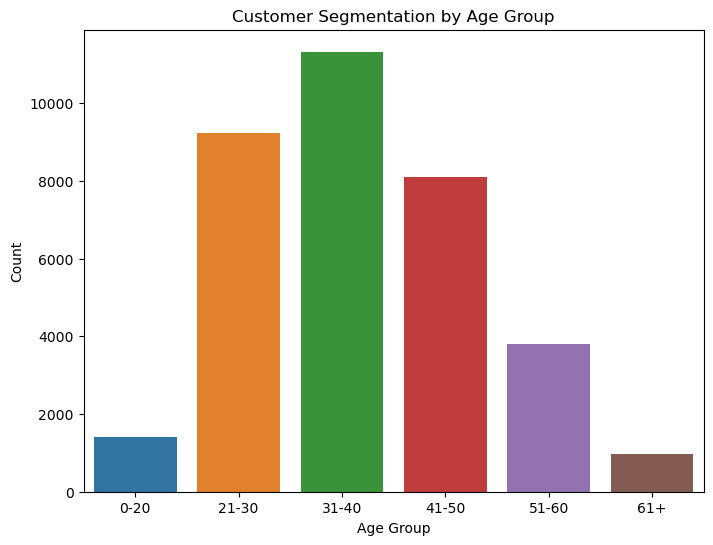

In [7]:
# 4. Market Segmentation
# Segment customers based on demographics or purchasing behavior
# For example, segment customers based on age group, gender, or product category

# Example: Segmentation based on age group
# Define age groups
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61+']
salesforcourse['Age Group'] = pd.cut(salesforcourse['Customer Age'], bins=bins, labels=labels, right=False)

# Visualize segmentation
plt.figure(figsize=(8, 6))
sns.countplot(x='Age Group', data=salesforcourse)
plt.title('Customer Segmentation by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

In [9]:
# 5. Customer Acquisition Cost (CAC) Analysis
# Calculate CAC as the total cost of sales and marketing divided by the number of new customers acquired
# Assume cost of sales and marketing is available in the dataset
total_cost_sales_marketing = salesforcourse['Cost'].sum()  # Total cost of sales and marketing
new_customers_acquired = salesforcourse[salesforcourse['Date'].dt.year == salesforcourse['Date'].dt.year.min()]['index'].nunique()  # Assuming new customers acquired in the first year
cac = total_cost_sales_marketing / new_customers_acquired

print("Customer Acquisition Cost (CAC):", cac)

Customer Acquisition Cost (CAC): 1337.1711831679872


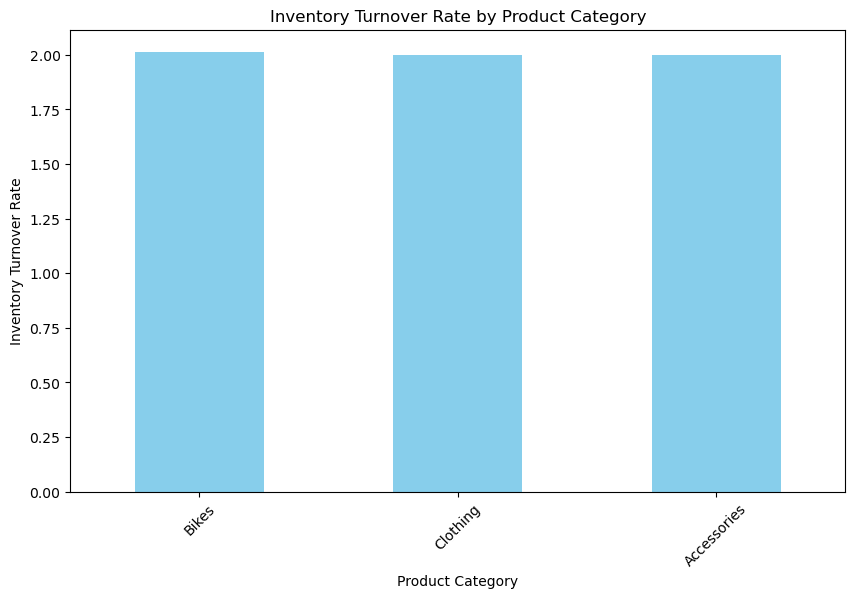

In [10]:
# 7. Inventory Management Analysis
# Analyze inventory turnover rates and identify slow-moving or obsolete inventory
# Calculate inventory turnover rate for each product category
inventory_turnover = salesforcourse.groupby('Product Category')['Quantity'].sum() / salesforcourse.groupby('Product Category')['Quantity'].count()

# Visualize inventory turnover rates
plt.figure(figsize=(10, 6))
inventory_turnover.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Inventory Turnover Rate by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Inventory Turnover Rate')
plt.xticks(rotation=45)
plt.show()


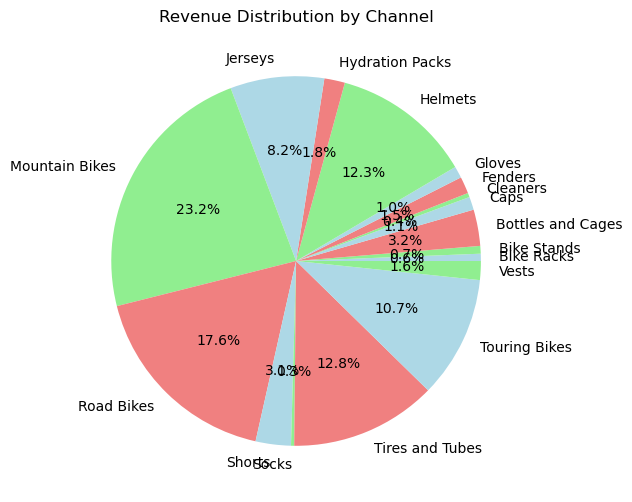

In [11]:
# 9. Channel Performance Analysis
# Evaluate the performance of different sales channels (e.g., online, offline)
# Calculate revenue generated from each channel

# Example: Channel Performance Analysis
# Calculate revenue by channel
channel_revenue = salesforcourse.groupby('Sub Category')['Revenue'].sum()

# Visualize revenue by channel
plt.figure(figsize=(8, 6))
channel_revenue.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Revenue Distribution by Channel')
plt.ylabel('')
plt.show()

In [14]:
# 11. Effectiveness of Promotional Campaigns
# Evaluate the ROI of promotional campaigns
# Compare revenue before and after the launch of promotional campaigns

# Example: Effectiveness of Promotional Campaigns
# Calculate revenue before and after the launch of promotional campaigns
promotion_start_date = pd.to_datetime('2023-01-01')
promotion_end_date = pd.to_datetime('2023-06-01')

revenue_before_promotion = salesforcourse[salesforcourse['Date'] < promotion_start_date]['Revenue'].sum()
revenue_during_promotion = salesforcourse[(salesforcourse['Date'] >= promotion_start_date) & (salesforcourse['Date'] <= promotion_end_date)]['Revenue'].sum()

roi = (revenue_during_promotion - revenue_before_promotion) / revenue_before_promotion * 100

print("ROI of Promotional Campaigns:", roi)

ROI of Promotional Campaigns: -100.0


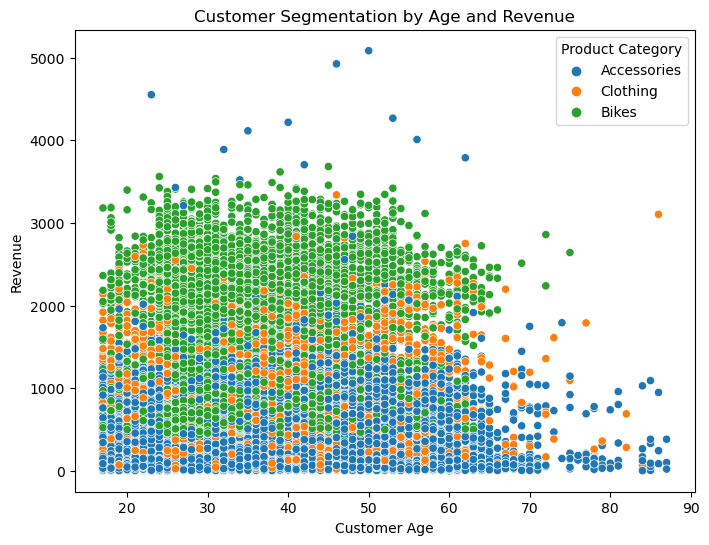

In [16]:
# 12. Customer Segmentation and Personalization
# Implement personalized marketing strategies based on customer segmentation and preferences
# Analyze customer segments and tailor marketing campaigns accordingly

# Example: Customer Segmentation and Personalization
# Segment customers based on demographics or purchasing behavior
# Implement personalized recommendations for each segment

# Visualize segmentation
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Customer Age', y='Revenue', hue='Product Category', data=salesforcourse)
plt.title('Customer Segmentation by Age and Revenue')
plt.xlabel('Customer Age')
plt.ylabel('Revenue')
plt.show()

   index        Date    Year     Month  Customer Age Customer Gender  \
0      0   2/19/2016  2016.0  February          29.0               F   
1      1   2/20/2016  2016.0  February          29.0               F   
2      2   2/27/2016  2016.0  February          29.0               F   
3      3  03-12-2016  2016.0     March          29.0               F   
4      4  03-12-2016  2016.0     March          29.0               F   

         Country       State Product Category     Sub Category  Quantity  \
0  United States  Washington      Accessories  Tires and Tubes       1.0   
1  United States  Washington         Clothing           Gloves       2.0   
2  United States  Washington      Accessories  Tires and Tubes       3.0   
3  United States  Washington      Accessories  Tires and Tubes       2.0   
4  United States  Washington      Accessories  Tires and Tubes       3.0   

   Unit Cost  Unit Price   Cost  Revenue  Column1  
0      80.00  109.000000   80.0    109.0      NaN  
1     

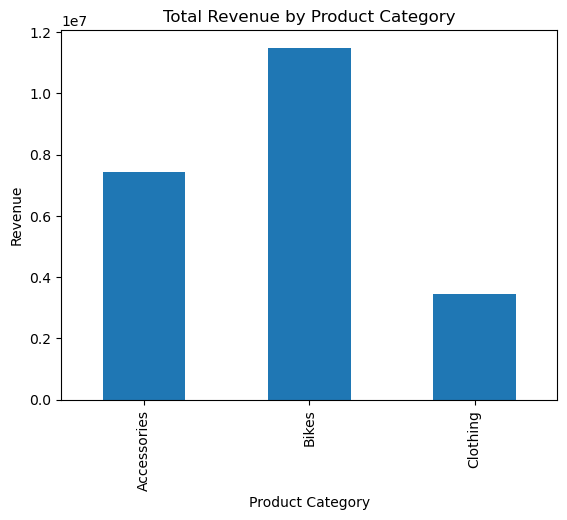

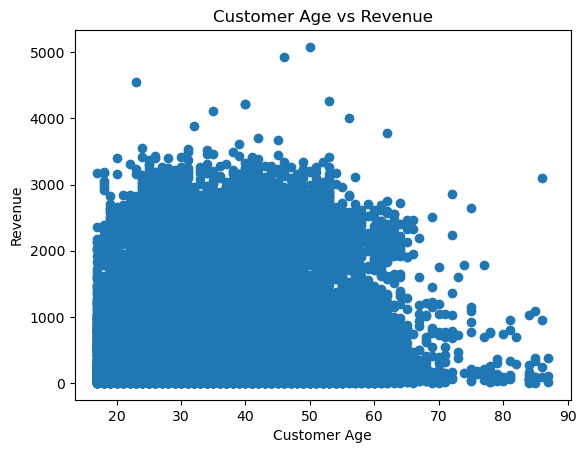

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('salesforcourse.csv')

# Display the first 5 rows of the dataset
print(df.head())

# Display the statistical summary of the dataset
print(df.describe())

# Display the unique values in the 'Customer Gender' column
print(df['Customer Gender'].unique())

# Display the number of unique values in the 'Country' column
print(df['Country'].nunique())

# Group the dataset by 'Product Category' and calculate the total revenue
grouped_df = df.groupby('Product Category')['Revenue'].sum()
print(grouped_df)

# Create a bar plot of the total revenue for each product category
grouped_df.plot(kind='bar')
plt.title('Total Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Revenue')
plt.show()

# Create a scatter plot of 'Customer Age' vs 'Revenue'
plt.scatter(df['Customer Age'], df['Revenue'])
plt.title('Customer Age vs Revenue')
plt.xlabel('Customer Age')
plt.ylabel('Revenue')
plt.show()

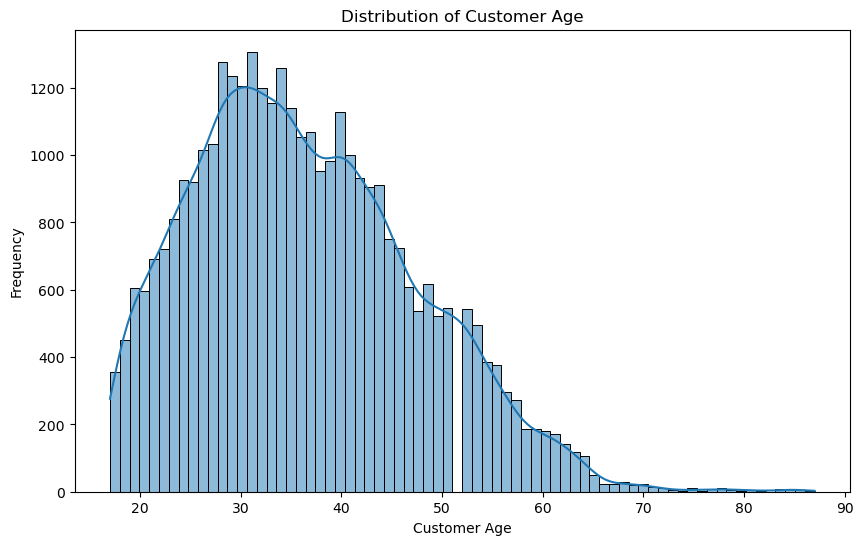

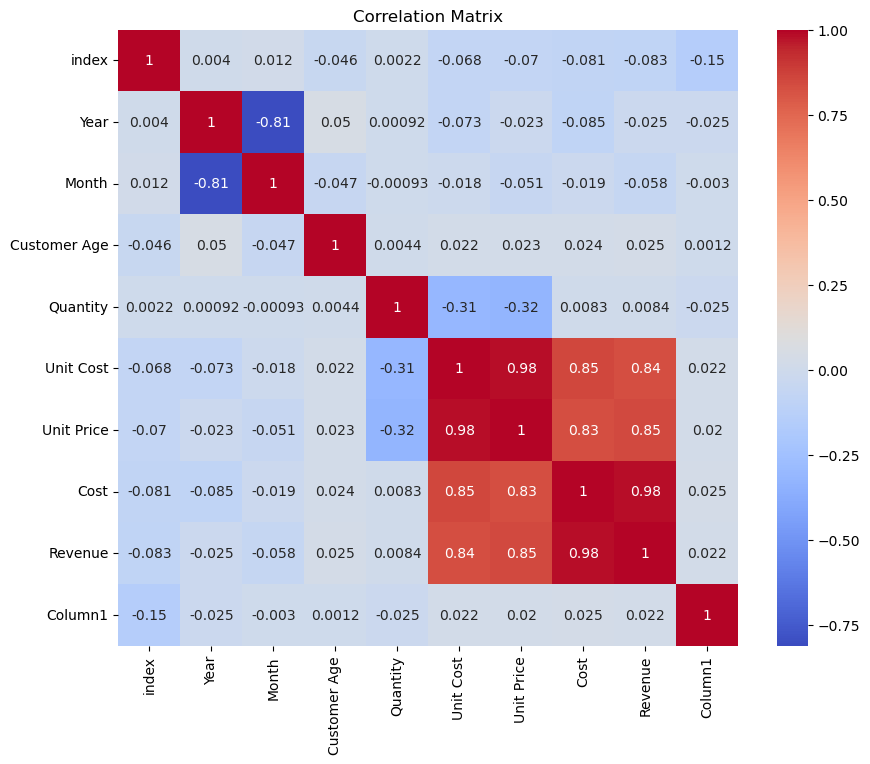

In [21]:
# Clean and preprocess the data
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Customer Age'] = pd.to_numeric(df['Customer Age'], errors='coerce')
df['Unit Cost'] = pd.to_numeric(df['Unit Cost'], errors='coerce')
df['Unit Price'] = pd.to_numeric(df['Unit Price'], errors='coerce')
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Cost'] = df['Unit Cost'] * df['Quantity']
df['Revenue'] = df['Unit Price'] * df['Quantity']

# Calculate summary statistics
summary_stats = df.describe()

# Analyze the distribution of customer age
plt.figure(figsize=(10, 6))
sns.histplot(df['Customer Age'], kde=True)
plt.title('Distribution of Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('Frequency')
plt.show()

# Analyze the correlation between variables
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


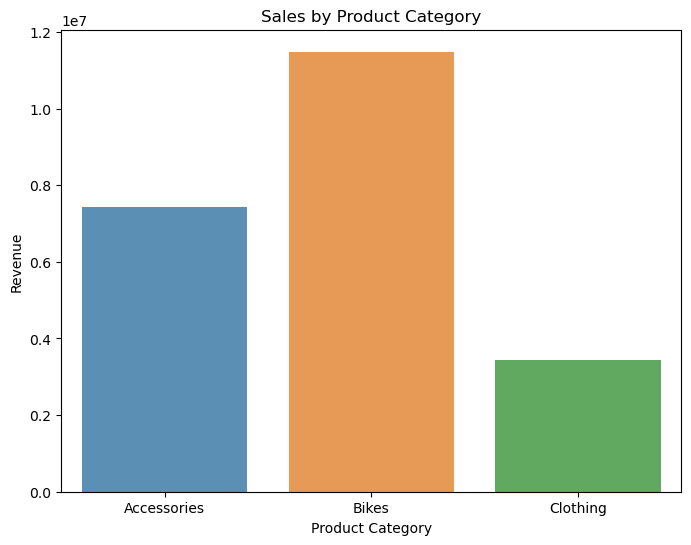

In [22]:
# Analyze the distribution of sales by product category
sales_by_category = df.groupby('Product Category')['Revenue'].sum()
plt.figure(figsize=(8, 6))
sns.barplot(x=sales_by_category.index, y=sales_by_category.values, alpha=0.8)
plt.title('Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Revenue')
plt.show()


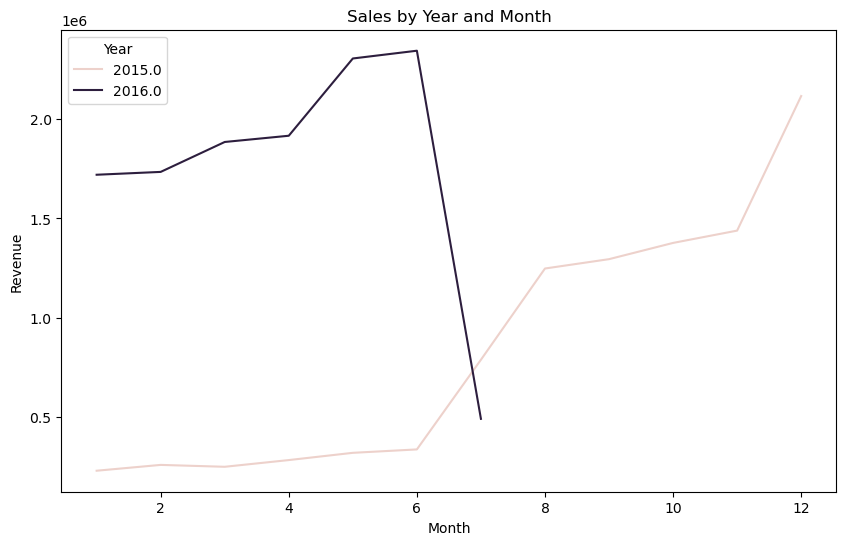

In [25]:
sales_by_month = df.groupby([df['Year'], df['Month']])['Revenue'].sum()
sales_by_month = sales_by_month.reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Revenue', hue='Year', data=sales_by_month)
plt.title('Sales by Year and Month')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()

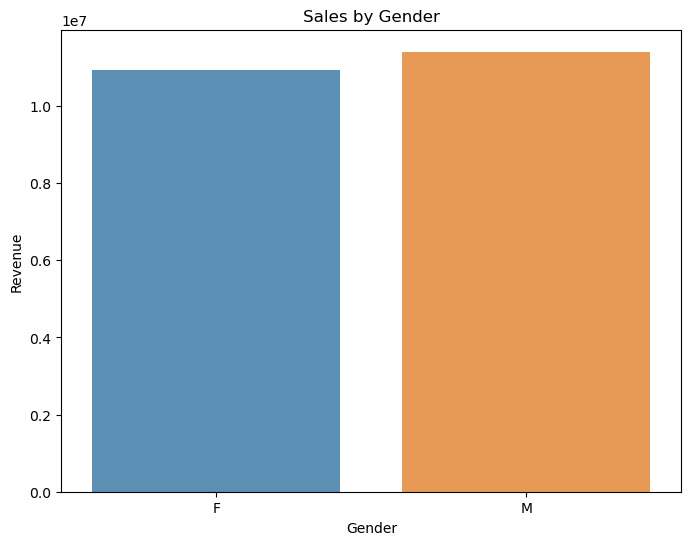

In [26]:
sales_by_gender = df.groupby('Customer Gender')['Revenue'].sum()
plt.figure(figsize=(8, 6))
sns.barplot(x=sales_by_gender.index, y=sales_by_gender.values, alpha=0.8)
plt.title('Sales by Gender')
plt.xlabel('Gender')
plt.ylabel('Revenue')
plt.show()

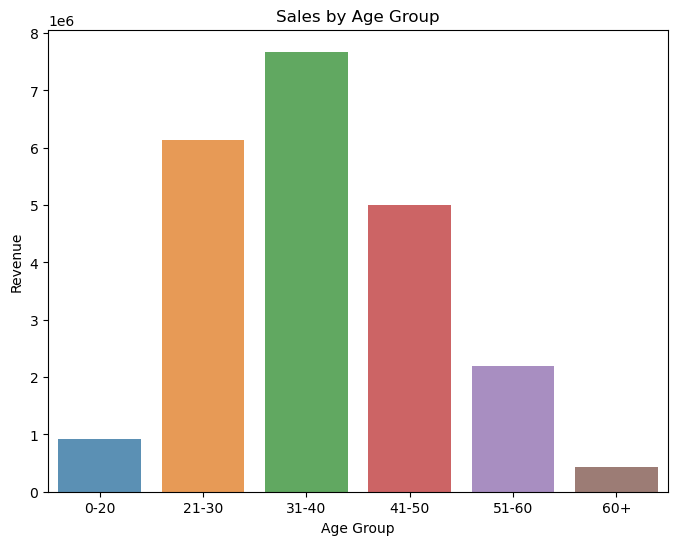

In [27]:
df['Age Group'] = pd.cut(df['Customer Age'], bins=[0, 20, 30, 40, 50, 60, 100], labels=['0-20', '21-30', '31-40', '41-50', '51-60', '60+'])
sales_by_age_group = df.groupby('Age Group')['Revenue'].sum()
plt.figure(figsize=(8, 6))
sns.barplot(x=sales_by_age_group.index, y=sales_by_age_group.values, alpha=0.8)
plt.title('Sales by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Revenue')
plt.show()

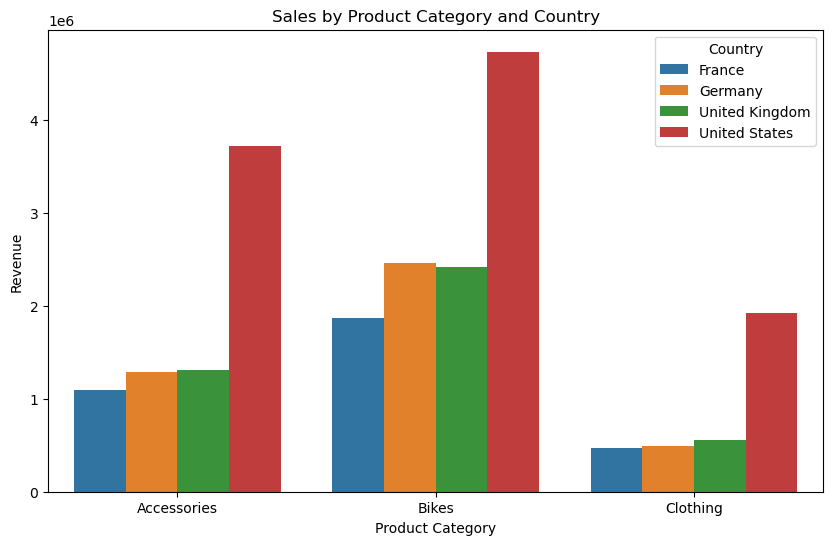

In [28]:
sales_by_category_country = df.groupby(['Product Category', 'Country'])['Revenue'].sum()
sales_by_category_country = sales_by_category_country.reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Product Category', y='Revenue', hue='Country', data=sales_by_category_country)
plt.title('Sales by Product Category and Country')
plt.xlabel('Product Category')
plt.ylabel('Revenue')
plt.show()

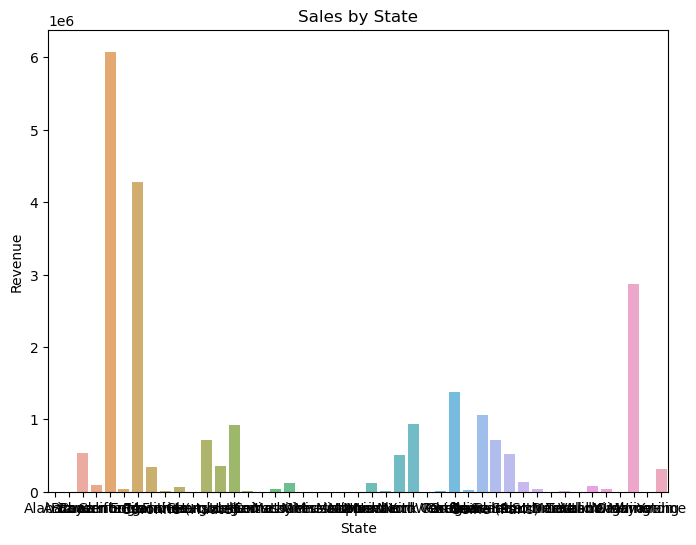

In [29]:
sales_by_state = df.groupby('State')['Revenue'].sum()
plt.figure(figsize=(8, 6))
sns.barplot(x=sales_by_state.index, y=sales_by_state.values, alpha=0.8)
plt.title('Sales by State')
plt.xlabel('State')
plt.ylabel('Revenue')
plt.show()